# An analysis of Canada's labour market from 1976 - Present

Author: Rehan Nasir

This project takes an in-depth look at employment trends for each province and for Canada, using historical data spanning from 1976 to the present.

My other goal is to use the Facebook Prophet model to predict future employment and population values.

## 1 - Loading the dataset

### [Dataset source](https://www.kaggle.com/datasets/pienik/unemployment-in-canada-by-province-1976-present)

This dataset uses REAL, verified data from [14-10-0287-03 Labour force characteristics by province, monthly, seasonally adjusted](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1410028703).


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

url = "https://raw.githubusercontent.com/rehan-nasir/unemployment_rate_canada/refs/heads/main/dataset/Unemployment_Canada_1976_present.csv"

df = pd.read_csv(url, sep=",")
df.head()

,REF_DATE,GEO,Sex,Age group,Employment,Full-time employment,Labour force,Part-time employment,Population,Unemployment,Employment rate,Participation rate,Unemployment rate
0,1976-01,Alberta,Both sexes,15 to 24 years,231800.0,174900.0,252300.0,56900.0,362300.0,20500.0,64.0,69.6,8.1
1,1976-01,Alberta,Both sexes,15 to 64 years,802400.0,682100.0,837500.0,120300.0,1154800.0,35000.0,69.5,72.5,4.2
2,1976-01,Alberta,Both sexes,15 years and over,819500.0,693700.0,856500.0,125800.0,1276700.0,37000.0,64.2,67.1,4.3
3,1976-01,Alberta,Both sexes,25 to 54 years,491400.0,439800.0,505800.0,51600.0,661700.0,14400.0,74.3,76.4,2.8
4,1976-01,Alberta,Both sexes,25 years and over,587700.0,518800.0,604200.0,68900.0,914400.0,16500.0,64.3,66.1,2.7


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38985 entries, 0 to 38984
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   REF_DATE               38985 non-null  object 
 1   GEO                    38985 non-null  object 
 2   Sex                    38985 non-null  object 
 3   Age group              38985 non-null  object 
 4   Employment             38985 non-null  float64
 5   Full-time employment   37290 non-null  float64
 6   Labour force           38985 non-null  float64
 7   Part-time employment   37289 non-null  float64
 8   Population             38985 non-null  float64
 9   Unemployment           38979 non-null  float64
 10  Employment rate        38985 non-null  float64
 11  Participation rate     38985 non-null  float64
 12  Unemployment rate      38979 non-null  float64
dtypes: float64(9), object(4)
memory usage: 3.9+ MB


Dataset Columns:
- REF_DATE: Year and Month.
- GEO: Province or Country.
- Sex: Both sexes (Data for individual sexes is unavailable.).
- Age Group: Range of ages in years.
- Employment: Number of people employed in both full-time and part-time jobs.
- Full-time Employment: Number of people employed in a full-time job.
- Labour force: Number of civilian, non-institutionalized people 15 years of age and over who, during the reference week, were employed or unemployed.
- Part-time Employment: Number of people employed in a part-time job.
- Population: Number of people that are of working age, 15 years and over.
- Unemployment: Number of people who, during the reference week, were without work, had looked for work in the past four weeks, and were available for work. Those persons on layoff or who had a new job to start in four weeks or less are considered unemployed.
- Employment rate: % of people employed.
- Participation rate: The participation rate is the number of labour force participants expressed as a percentage of the population 15 years of age and over. 
- Unemployment rate: % of people unemployed.

## 2 - Cleaning the data

### Null/Missing Values

In [3]:
df.isna().sum()

REF_DATE                    0
GEO                         0
Sex                         0
Age group                   0
Employment                  0
Full-time employment     1695
Labour force                0
Part-time employment     1696
Population                  0
Unemployment                6
Employment rate             0
Participation rate          0
Unemployment rate           6
dtype: int64

Columns Full-time employment and Part-time employment have missing/null values. Before I do anything, I should look at which rows contain these null values, and see if there's a pattern.

In [4]:
df[df.isna().any(axis=1)]


,REF_DATE,GEO,Sex,Age group,Employment,Full-time employment,Labour force,Part-time employment,Population,Unemployment,Employment rate,Participation rate,Unemployment rate
12,1976-01,Canada,Both sexes,15 to 19 years,999200.0,NaN,1178900.0,NaN,2330000.0,179700.0,42.9,50.6,15.2
16,1976-01,Canada,Both sexes,20 to 24 years,1500400.0,NaN,1670500.0,NaN,2179800.0,170100.0,68.8,76.6,10.2
19,1976-01,Canada,Both sexes,55 to 64 years,955600.0,NaN,999700.0,NaN,1886900.0,44100.0,50.6,53.0,4.4
81,1976-02,Canada,Both sexes,15 to 19 years,1000500.0,NaN,1177800.0,NaN,2333000.0,177300.0,42.9,50.5,15.1
85,1976-02,Canada,Both sexes,20 to 24 years,1508600.0,NaN,1679300.0,NaN,2185200.0,170700.0,69.0,76.8,10.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38863,2022-12,Canada,Both sexes,20 to 24 years,1708900.0,NaN,1864200.0,NaN,2404600.0,155300.0,71.1,77.5,8.3
38866,2022-12,Canada,Both sexes,55 to 64 years,3300500.0,NaN,3451000.0,NaN,5144500.0,150600.0,64.2,67.1,4.4
38928,2023-01,Canada,Both sexes,15 to 19 years,959600.0,NaN,1090200.0,NaN,2112500.0,130600.0,45.4,51.6,12.0
38932,2023-01,Canada,Both sexes,20 to 24 years,1726700.0,NaN,1879500.0,NaN,2412000.0,152700.0,71.6,77.9,8.1


By looking at all the rows containing null values, we can see null values are only in rows that have "Canada" under GEO.
Upon further inspection, I see that these null values occur because of age group values exclusive to "Canada". I can prove this by checking the unique age group values Canada and the provinces have.

In [5]:
country_age_groups = df[df["GEO"] == "Canada"]["Age group"]
provincial_age_groups = df[df["GEO"] != "Canada"]["Age group"]

exclusive_age_groups = list((set(country_age_groups.values) ^ set(provincial_age_groups.values)))
exclusive_age_groups

['20 to 24 years', '15 to 19 years', '55 to 64 years']

Age groups 55-64, 15-29, and 20-24 years are not shared between country and provincial age groups. To keep things consistent, I will drop any row containing these age groups.

In [6]:
clean_df = df.dropna()
clean_df.isna().sum()

REF_DATE                 0
GEO                      0
Sex                      0
Age group                0
Employment               0
Full-time employment     0
Labour force             0
Part-time employment     0
Population               0
Unemployment             0
Employment rate          0
Participation rate       0
Unemployment rate        0
dtype: int64

### Duplicate rows

In [7]:
clean_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
38980    False
38981    False
38982    False
38983    False
38984    False
Length: 37283, dtype: bool

Fortunately, there are no duplicates in our dataset. 

### Redundant Columns

- The column for Sex would have been helpful if the data was split for each sex. All rows contain 'Both sexes' as the same value, so dropping the entire column will have no affect on the rest of our data. 
- Labour force is just the sum of Employment and Unemployment, and doesn't provide much use.
- Participation isn't necessary either since that's just the labour force as a %.



In [8]:
clean_df = clean_df.drop(columns=['Sex','Labour force', 'Participation rate'])
clean_df

,REF_DATE,GEO,Age group,Employment,Full-time employment,Part-time employment,Population,Unemployment,Employment rate,Unemployment rate
0,1976-01,Alberta,15 to 24 years,231800.0,174900.0,56900.0,362300.0,20500.0,64.0,8.1
1,1976-01,Alberta,15 to 64 years,802400.0,682100.0,120300.0,1154800.0,35000.0,69.5,4.2
2,1976-01,Alberta,15 years and over,819500.0,693700.0,125800.0,1276700.0,37000.0,64.2,4.3
3,1976-01,Alberta,25 to 54 years,491400.0,439800.0,51600.0,661700.0,14400.0,74.3,2.8
4,1976-01,Alberta,25 years and over,587700.0,518800.0,68900.0,914400.0,16500.0,64.3,2.7
...,...,...,...,...,...,...,...,...,...,...
38980,2023-01,Saskatchewan,15 to 64 years,553900.0,458100.0,95800.0,719100.0,25900.0,77.0,4.5
38981,2023-01,Saskatchewan,15 years and over,589000.0,479000.0,110000.0,912000.0,26500.0,64.6,4.3
38982,2023-01,Saskatchewan,25 to 54 years,379900.0,337300.0,42600.0,442400.0,14600.0,85.9,3.7
38983,2023-01,Saskatchewan,25 years and over,507400.0,436000.0,71500.0,774200.0,18700.0,65.5,3.6


## 3 - Exploratory Data Analysis


I will look at the age group 15-64 years since 15 is minimum age to work at most jobs, and 64 is near the age of retirement.

In [9]:
labour_force_df = clean_df[clean_df['Age group'] == '15 to 64 years']
labour_force_df

,REF_DATE,GEO,Age group,Employment,Full-time employment,Part-time employment,Population,Unemployment,Employment rate,Unemployment rate
1,1976-01,Alberta,15 to 64 years,802400.0,682100.0,120300.0,1154800.0,35000.0,69.5,4.2
7,1976-01,British Columbia,15 to 64 years,1015500.0,867400.0,148000.0,1628800.0,93000.0,62.3,8.4
14,1976-01,Canada,15 to 64 years,9465600.0,8315800.0,1149800.0,15015900.0,719400.0,63.0,7.1
22,1976-01,Manitoba,15 to 64 years,418600.0,363600.0,55100.0,635700.0,23900.0,65.8,5.4
28,1976-01,New Brunswick,15 to 64 years,227100.0,199500.0,27600.0,419800.0,28700.0,54.1,11.2
...,...,...,...,...,...,...,...,...,...,...
38956,2023-01,Nova Scotia,15 to 64 years,472600.0,395300.0,77300.0,632500.0,25900.0,74.7,5.2
38962,2023-01,Ontario,15 to 64 years,7450000.0,6257000.0,1193000.0,9908200.0,422900.0,75.2,5.4
38968,2023-01,Prince Edward Island,15 to 64 years,78900.0,67100.0,11900.0,108100.0,6500.0,73.0,7.6
38974,2023-01,Quebec,15 to 64 years,4294200.0,3587000.0,707100.0,5433300.0,187100.0,79.0,4.2


### Employment and Unemployment rates for the entirety of Canada

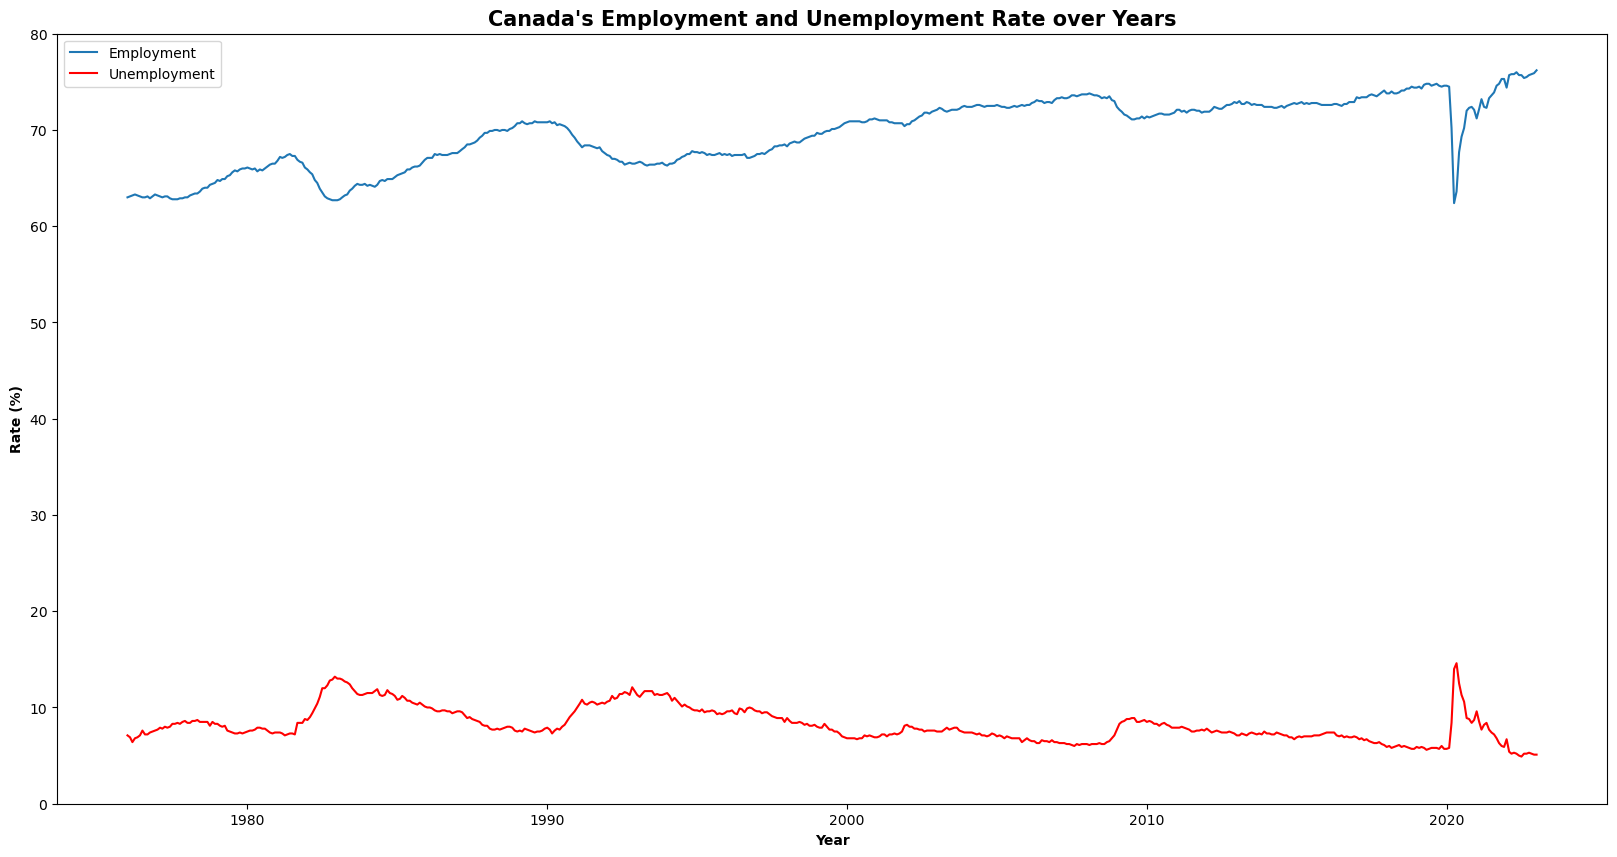

In [10]:
canada_df = labour_force_df[labour_force_df['GEO'] == 'Canada']
canada_df["REF_DATE"] = pd.to_datetime(canada_df["REF_DATE"])

sns.lineplot(x='REF_DATE', y='Employment rate', data=canada_df, label='Employment')
sns.lineplot(x='REF_DATE', y='Unemployment rate', data=canada_df, color='red', label='Unemployment')
plt.title("Canada's Employment and Unemployment Rate over Years", fontsize=15, fontweight="bold")
plt.ylim(0, 80)
plt.ylabel("Rate (%)", fontsize=10, fontweight="bold")
plt.xlabel("Year", fontsize=10, fontweight="bold")
plt.gcf().set_size_inches(20, 10)
plt.show()

The unemployment rate looks to be the inverse of the employment rate. Currently, the present looks to have the highest employment rate and lowest unemployment rate.

### Employment and Unemployment rate by province

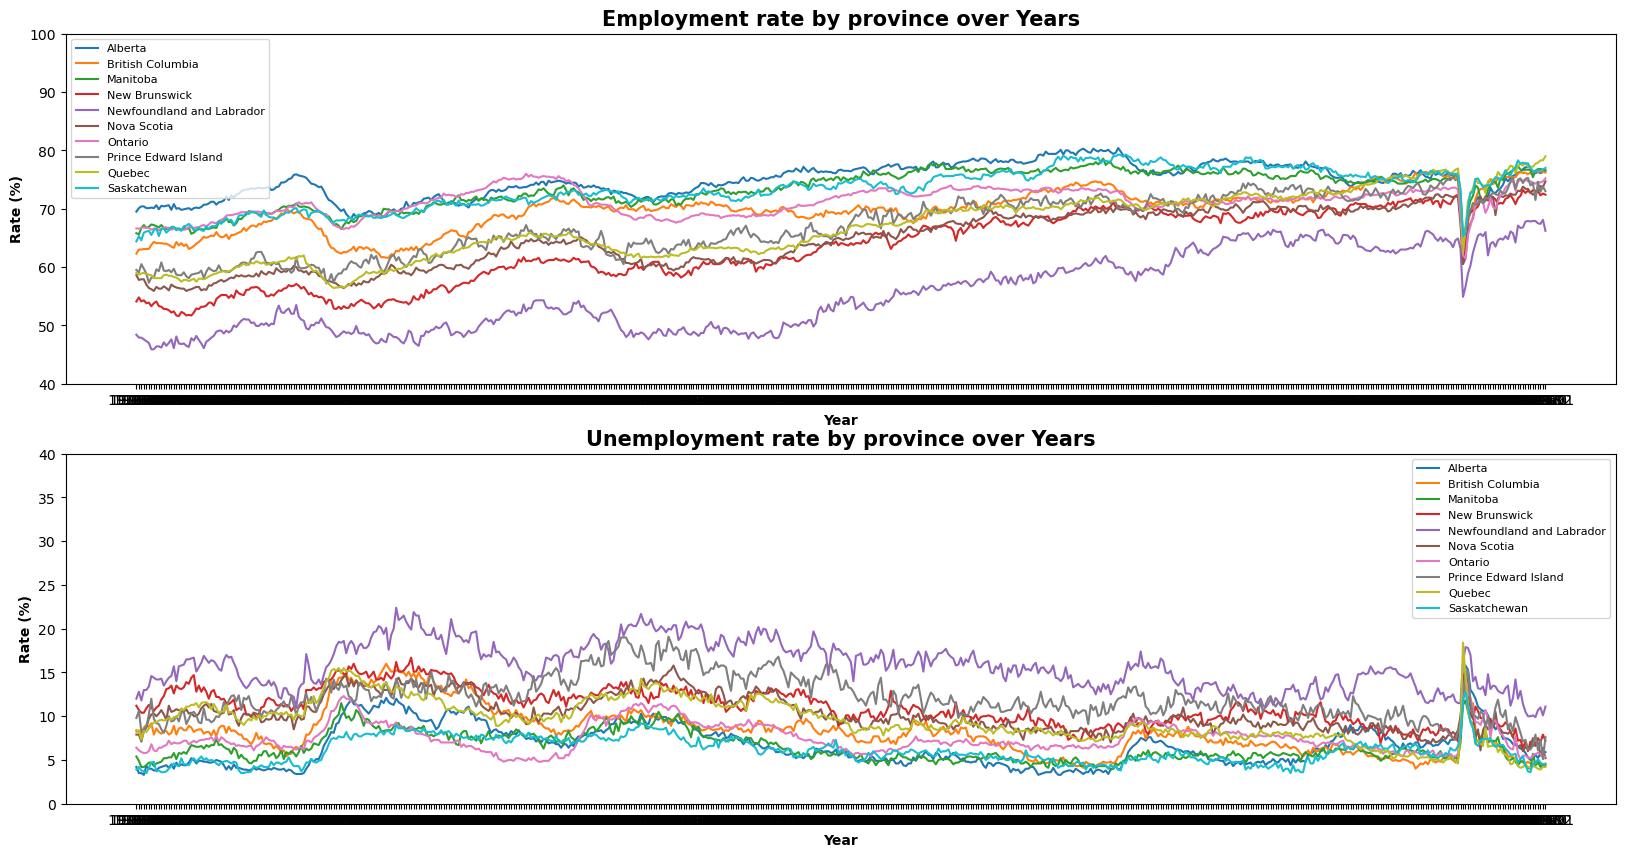

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=1)

for province, p_df in labour_force_df[labour_force_df["GEO"] != "Canada"].groupby("GEO"):
    sns.lineplot(x="REF_DATE", y="Employment rate", data=p_df, label=province, ax=ax[0])
    sns.lineplot(x="REF_DATE", y="Unemployment rate", data=p_df, label=province, ax=ax[1])

ax[0].set_xlabel("Year", fontsize=10, fontweight="bold")
ax[0].set_ylabel("Rate (%)", fontsize=10, fontweight="bold")
ax[0].set_title("Employment rate by province over Years", fontsize=15, fontweight="bold")
ax[0].set_ylim(40, 100)
        
ax[1].set_xlabel("Year", fontsize=10, fontweight="bold")
ax[1].set_ylabel("Rate (%)", fontsize=10, fontweight="bold")
ax[1].set_title("Unemployment rate by province over Years", fontsize=15, fontweight="bold")
ax[1].set_ylim(0, 40)

for a in ax:
      a.legend(fontsize=8)

plt.gcf().set_size_inches(20, 10)
plt.show()

All provinces are show a dip in the employment rate and a spike in the unemployment rate around 2020, the same time when the COVID-19 pandemic began. Luckily, the employment rate recovered back to where it originally was.

Overall, the employment rate for the whole country has been increasing, and is currently at the highest it's ever been. Since 1976, Newfoundland and Labrador has had the lowest unemployment rate out of all the provinces. Currently, Quebec has the highest employment rate.

### Population of Labour Force

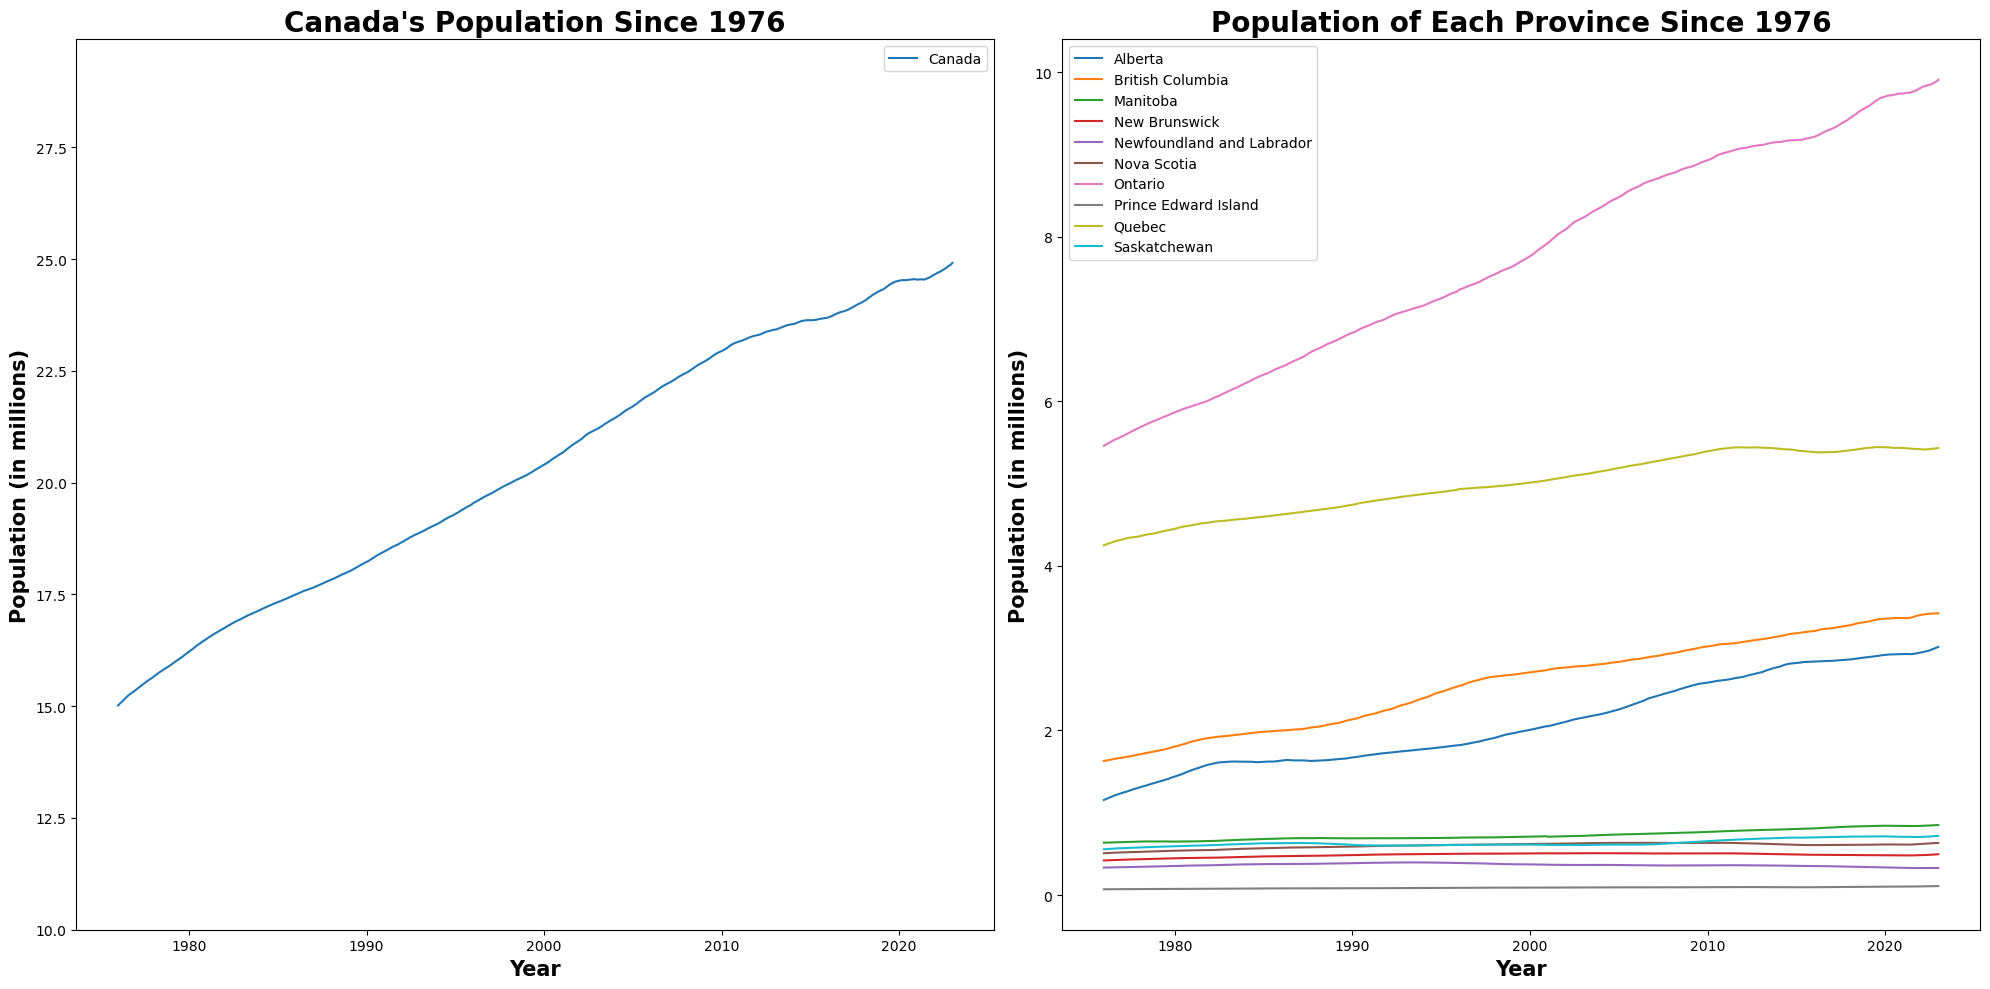

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
labour_force_df["REF_DATE"] = pd.to_datetime(labour_force_df["REF_DATE"])
canada_df["REF_DATE"] = pd.to_datetime(canada_df["REF_DATE"])
pop_in_mil = canada_df['Population'] / 1000000

sns.lineplot(x='REF_DATE', y=pop_in_mil, data=canada_df, label='Canada', ax=ax[0])
ax[0].set_ylim(10, pop_in_mil.max() + 5)
ax[0].set_title("Canada's Population Since 1976", fontsize=20, fontweight="bold")
ax[0].set_xlabel("Year", fontsize=15, fontweight="bold")
ax[0].set_ylabel("Population (in millions)", fontsize=15, fontweight="bold")

for province, province_df in labour_force_df[labour_force_df["GEO"] != "Canada"].groupby("GEO"):
    province_df["Population_in_millions"] = province_df['Population'] / 1000000
    sns.lineplot(x='REF_DATE', y='Population_in_millions', data=province_df, label=province, ax=ax[1])

ax[1].set_title("Population of Each Province Since 1976", fontsize=20, fontweight="bold")
ax[1].set_xlabel("Year", fontsize=15, fontweight="bold")
ax[1].set_ylabel("Population (in millions)", fontsize=15, fontweight="bold")

plt.tight_layout()
plt.show()

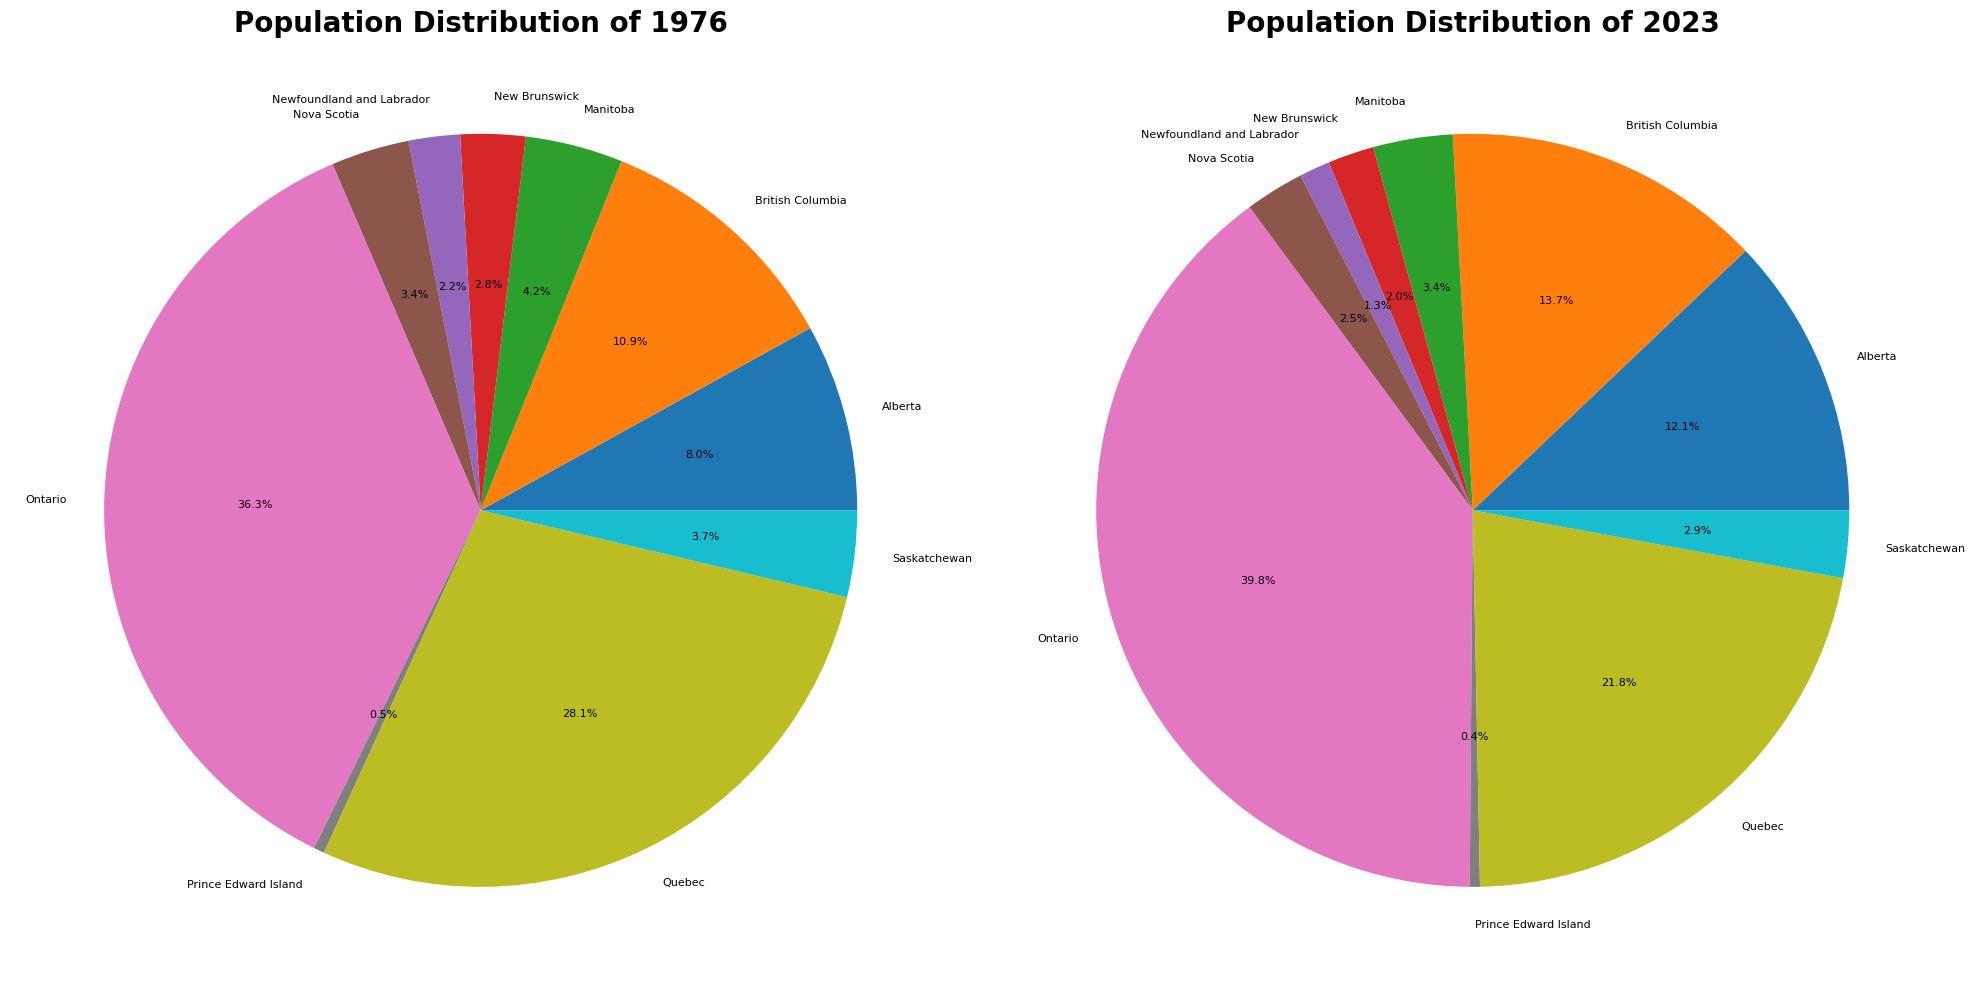

In [13]:
years = labour_force_df["REF_DATE"].dt.year.unique()
provinces_list = []
provinces_df = labour_force_df[labour_force_df["GEO"] != "Canada"]["GEO"].unique()

for province in provinces_df:
    province_df = labour_force_df[labour_force_df['GEO'] == province]
    province_df["REF_DATE"] = pd.to_datetime(province_df["REF_DATE"])
    provinces_list.append(province_df)

old_prov_population = []
new_prov_population = []

for province in provinces_list:
    old_prov_population.append(province[(province["REF_DATE"].dt.month == 12) & (province["REF_DATE"].dt.year == 1976)]['Population'].iloc[0])
    new_prov_population.append(province[(province["REF_DATE"].dt.month == 1) & (province["REF_DATE"].dt.year == years[len(years) - 1])]['Population'].iloc[0])

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].pie(old_prov_population, labels=provinces_df, textprops={'fontsize': 8}, autopct='%1.1f%%')
ax[0].set_title('Population Distribution of 1976', fontsize=20, fontweight="bold")

ax[1].pie(new_prov_population, labels=provinces_df, textprops={'fontsize': 8}, autopct='%1.1f%%')
ax[1].set_title(f'Population Distribution of {years[-1]}', fontsize=20, fontweight="bold")

plt.tight_layout()
plt.show()

The working population has increased by atleast 10 million in Canada since 1976. The line becomes in flat 2020 due to the COVID-19 lockdown, meaning nobody was leaving or entering the country. Looking at the provinces, Ontario, Quebec, British Columbia, and Alberta have noticeable increases in their working population. Prince Edward Island has the smallest working population out of all the provinces. Newfoundland and Labrador appears to be the only province with a current working population lower than it was in 1976. Let's verify this by checking the difference from now and then.

In [14]:
print('Population differences from 1976 to now')
for i in provinces_df:
    print(i)
    p = labour_force_df[labour_force_df['GEO'] == i]
    print(p.iloc[len(p) - 1]["Population"] - p.iloc[0]["Population"])

Population differences from 1976 to now
Alberta
1860200.0
British Columbia
1796100.0
Manitoba
214500.0
New Brunswick
75300.0
Newfoundland and Labrador
-4900.0
Nova Scotia
125000.0
Ontario
4448000.0
Prince Edward Island
38200.0
Quebec
1182600.0
Saskatchewan
163900.0


Newfoundland and Labrador has lost 4900 members of the working population since 1976. This makes me believe there is a correlation between Population and Employment rate. As population increases, the employment rate does too. Newfoundland and Labrador's population and employment rate supports this statement. We can verify this with a correlation matrix.

In [15]:
canada_df.corr(numeric_only=True)

,Employment,Full-time employment,Part-time employment,Population,Unemployment,Employment rate,Unemployment rate
Employment,1.000000,0.997343,0.969762,0.992515,0.228304,0.934642,-0.580129
Full-time employment,0.997343,1.000000,0.949405,0.987437,0.189851,0.933700,-0.610411
Part-time employment,0.969762,0.949405,1.000000,0.970677,0.348184,0.901214,-0.455981
Population,0.992515,0.987437,0.970677,1.000000,0.321251,0.887146,-0.500161
Unemployment,0.228304,0.189851,0.348184,0.321251,1.000000,-0.002247,0.646353
Employment rate,0.934642,0.933700,0.901214,0.887146,-0.002247,1.000000,-0.722253
Unemployment rate,-0.580129,-0.610411,-0.455981,-0.500161,0.646353,-0.722253,1.000000


Population vs. Employment rate has a correlation of 0.887146, which is fairly strong. We can see stronger correlations between other variables too.

Strong Correlations
- Employment has strong correlations with:
    - Full-time Employment
    - Part-time employment
    - Population
    - Employment rate


Which go back to the assumption I made earlier: As population increases, the employment does too.

Other Correlations:
- Employment Rate vs. Unemployment Rate
    - As employment rate rises, the unemployment rate decreases.



### Employment and Unemployment rates per Year

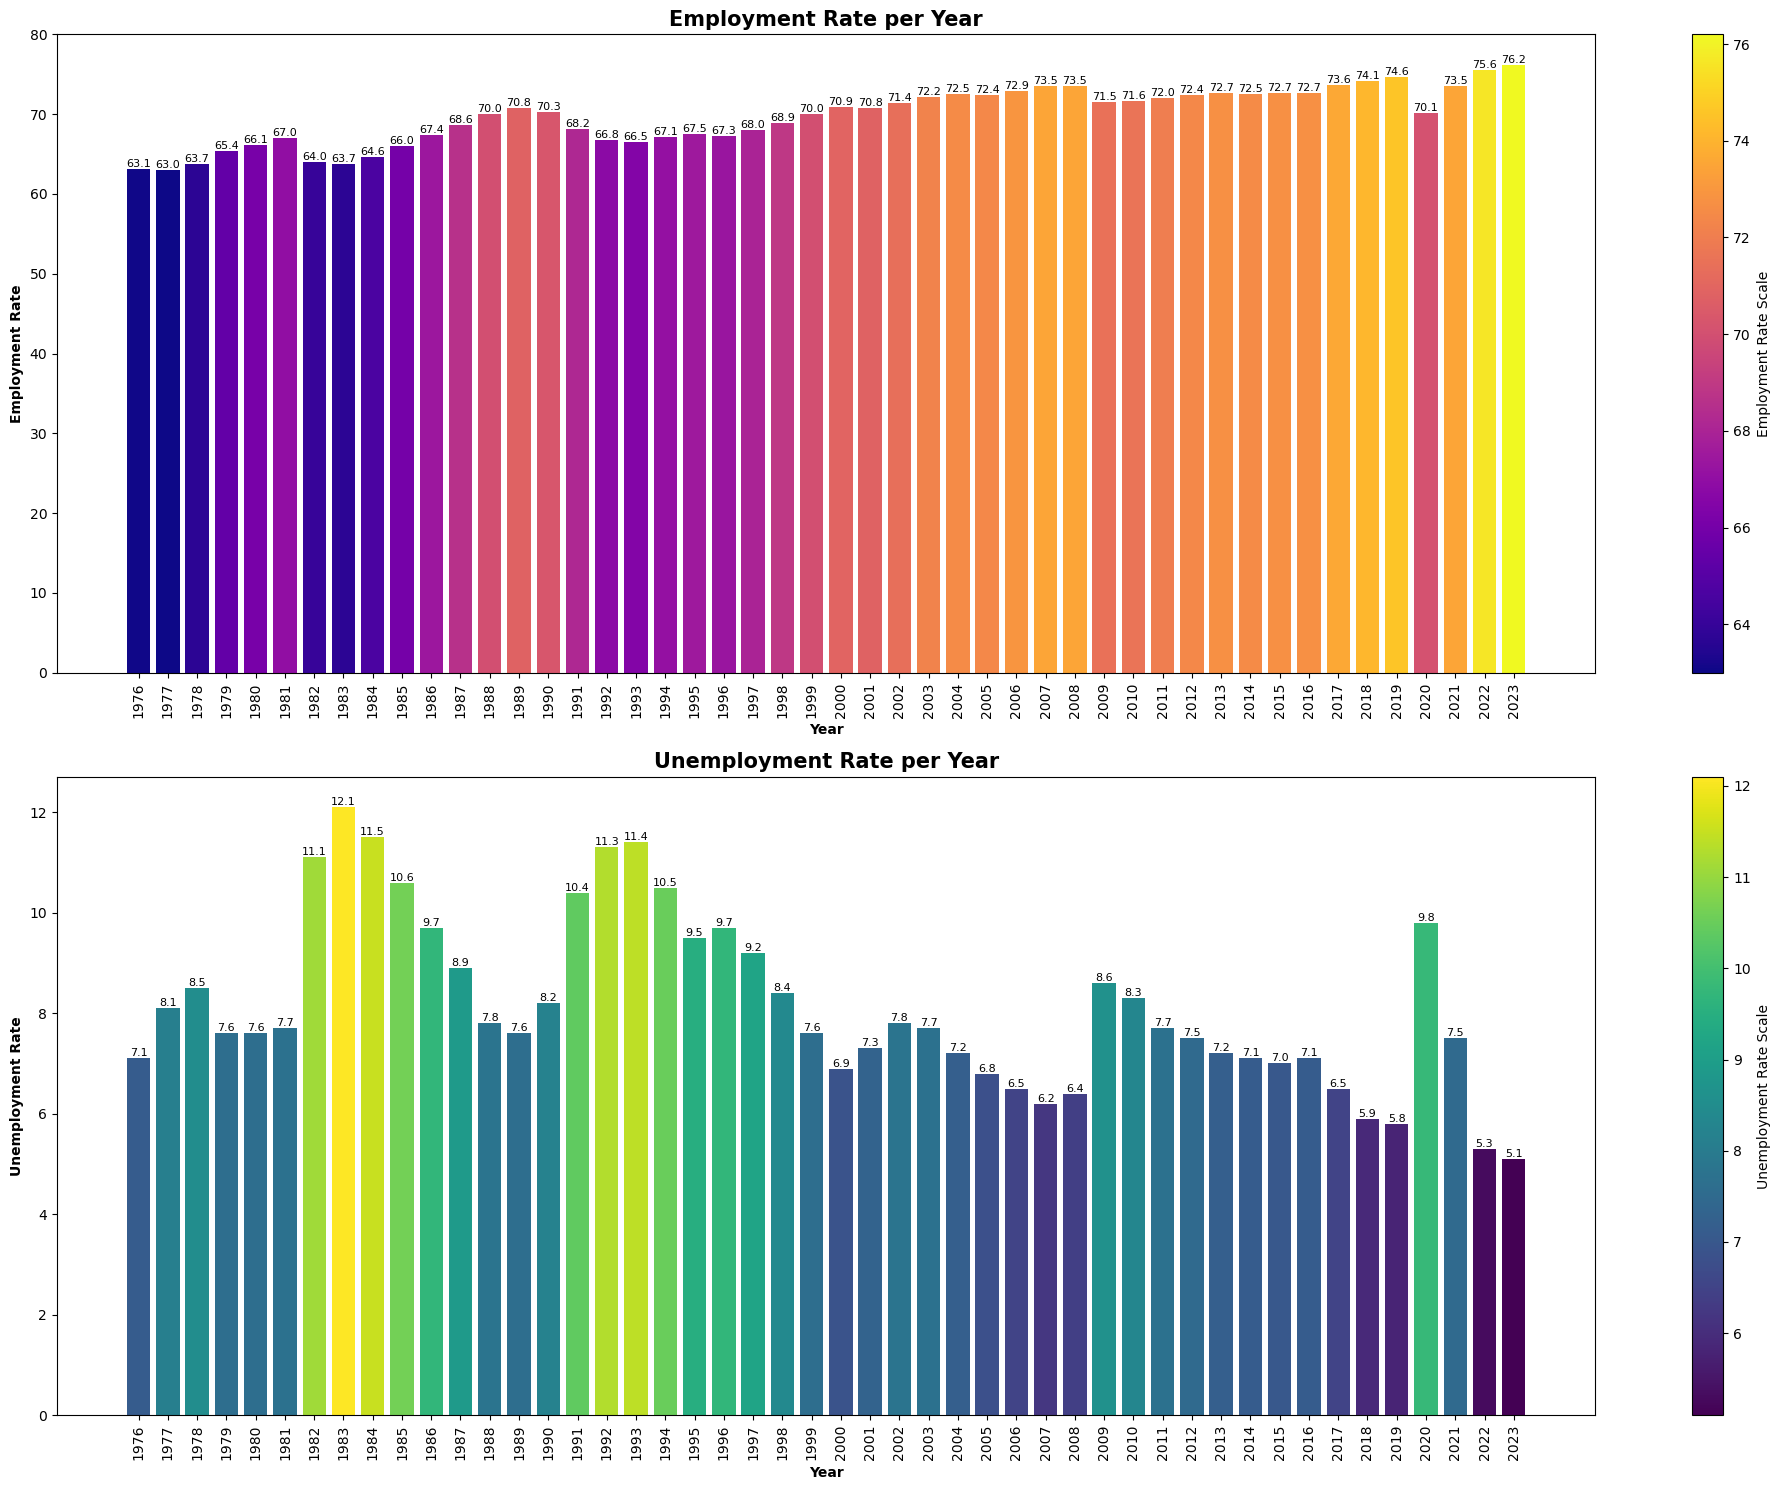

In [22]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 15))
avg_employment_rates = []
avg_unemployment_rates = []

for year in years:
    avg_employment_rates.append(round(canada_df[canada_df["REF_DATE"].dt.year == year]["Employment rate"].mean(), 1))
    avg_unemployment_rates.append(round(canada_df[canada_df["REF_DATE"].dt.year == year]["Unemployment rate"].mean(), 1))

employment_norm = plt.Normalize(min(avg_employment_rates), max(avg_employment_rates))
unemployment_norm = plt.Normalize(min(avg_unemployment_rates), max(avg_unemployment_rates))
employment_colors = plt.cm.plasma(employment_norm(avg_employment_rates))
unemployment_colors = plt.cm.viridis(unemployment_norm(avg_unemployment_rates))

employment_bars = ax[0].bar(years, avg_employment_rates, color=employment_colors)
ax[0].set_title("Employment Rate per Year", fontsize=15, fontweight='bold')
ax[0].set_xlabel("Year", fontsize=10, fontweight='bold')
ax[0].set_ylabel("Employment Rate", fontsize=10, fontweight='bold')
ax[0].set_xticks(years)
ax[0].set_xticklabels(years, rotation=90)

for bar in employment_bars:
    yval = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width()/2, yval, str(yval), ha='center', va='bottom', fontsize=8)


unemployment_bars = ax[1].bar(years, avg_unemployment_rates, color=unemployment_colors)
ax[1].set_title("Unemployment Rate per Year", fontsize=15, fontweight='bold')
ax[1].set_xlabel("Year", fontsize=10, fontweight='bold')
ax[1].set_ylabel("Unemployment Rate", fontsize=10, fontweight='bold')
ax[1].set_xticks(years)
ax[1].set_xticklabels(years, rotation=90)

for bar in unemployment_bars:
    yval = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width()/2, yval, str(yval), ha='center', va='bottom', fontsize=8)

sm1 = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=employment_norm)
sm2 = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=unemployment_norm)
fig.colorbar(sm1, ax=ax[0], label="Employment Rate Scale")
fig.colorbar(sm2, ax=ax[1], label="Unemployment Rate Scale")

plt.tight_layout()
plt.show()


The year with the highest average unemployment rate was in 1984, which could have been due to the economic recession. 2023 has the highest employment rate and lowest unemployment ever recorded, which is good considering how much the population has increased.

### Average Employment and Unemployment Rate per Age Group

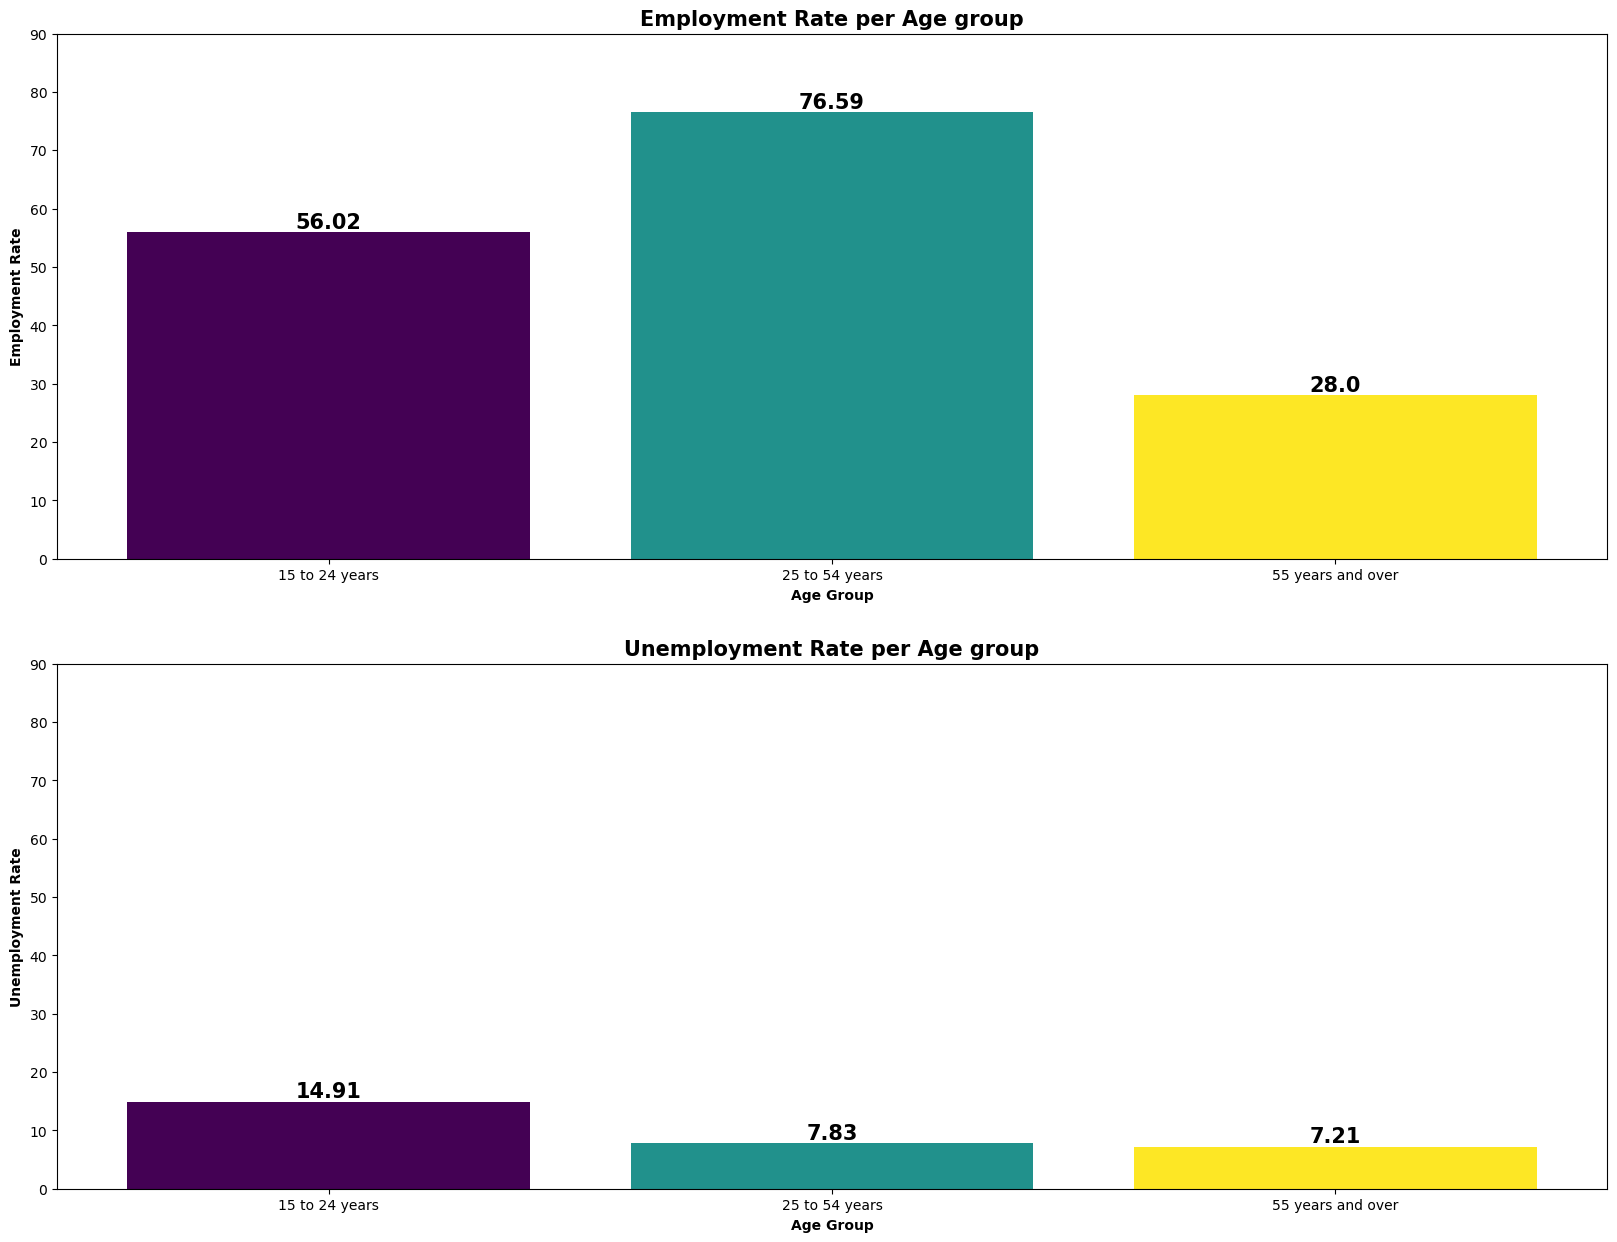

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 15))
age_group_rates = clean_df[(clean_df['Age group'] != '15 years and over') & (clean_df['Age group'] != '25 years and over') & (clean_df['Age group'] != '15 to 64 years')]
labour_age_groups = age_group_rates[age_group_rates['GEO'] == 'Canada']['Age group'].unique()
age_emp_list = []
age_unemp_list = []

for age_group in labour_age_groups:
    age_emp_rate = round(df[df['Age group'] == age_group]['Employment rate'].mean(), 2)
    age_unemp_rate = round(df[df['Age group'] == age_group]['Unemployment rate'].mean(), 2)
    age_emp_list.append(age_emp_rate)
    age_unemp_list.append(age_unemp_rate)

colors = plt.cm.viridis(np.linspace(0, 1, len(labour_age_groups)))
bars = ax[0].bar(labour_age_groups, age_emp_list, color=colors)
ax[0].set_title("Employment Rate per Age group", fontsize=15, fontweight='bold')
ax[0].set_xlabel("Age Group", fontsize=10, fontweight='bold')
ax[0].set_ylabel("Employment Rate", fontsize=10, fontweight='bold')
ax[0].set_xticklabels(labour_age_groups)
ax[0].set_ylim(0, 90)

for bar in bars:
    yval = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width()/2, yval, str(yval), ha='center', va='bottom', fontsize=15, fontweight='bold')

colors = plt.cm.viridis(np.linspace(0, 1, len(labour_age_groups)))
bars_un = ax[1].bar(labour_age_groups, age_unemp_list, color=colors)
ax[1].set_title("Unemployment Rate per Age group", fontsize=15, fontweight='bold')
ax[1].set_xlabel("Age Group", fontsize=10, fontweight='bold')
ax[1].set_ylabel("Unemployment Rate", fontsize=10, fontweight='bold')
ax[1].set_xticklabels(labour_age_groups)
ax[1].set_ylim(0, 90)

for bar in bars_un:
    yval = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width()/2, yval, str(yval), ha='center', va='bottom', fontsize=15, fontweight='bold')

plt.show()

15 - 24 years
- The second highest average employment rate.
- People in this range are mainly focused on their education, either high school or post-secondary.
- Some might work part-time jobs while still in school.
- Post-secondary students might do internships.
- Those who didn't pursue a post-secondary education will work full-time jobs.
- Also has the highest average unemployment rate, possibly due to layoffs.

25 - 54 years
- The highest average employment rate.
- Most people in this range have completed their post-secondary education, some might pursue post-grad degrees.
- Many will work full-time jobs.

55 years and over
- The second lowest average employment rate.
- People in this range are close to retirement.

## 4 - Forecasting using Facebook Prophet

The Facebook Prophet model is designed for time-series forecasting. With this model, I can predict future trends for Employment/Unemployment rates, and the population. The period will be the next 5 years.

### Employment rate forecast 

01:52:15 - cmdstanpy - INFO - Chain [1] start processing
01:52:15 - cmdstanpy - INFO - Chain [1] done processing


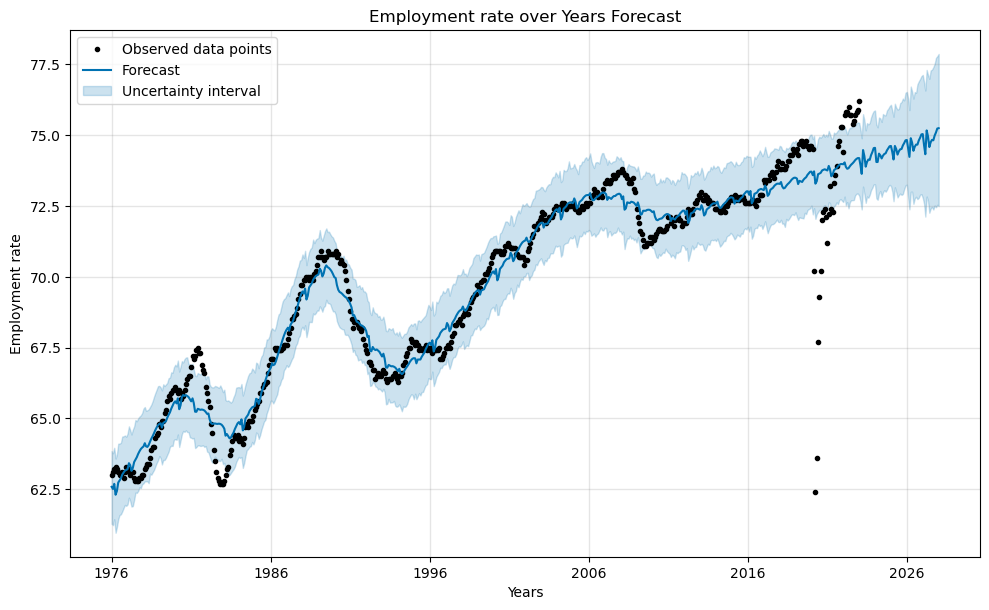

In [18]:
from prophet import Prophet

fb_df = pd.read_csv(url)
fb_df = fb_df[(fb_df['GEO'] == 'Canada') & (fb_df['Age group'] == '15 to 64 years')]
fb_df = fb_df[['REF_DATE', 'Employment rate']]
fb_df['REF_DATE'] = pd.to_datetime(fb_df['REF_DATE'])
fb_df = fb_df.rename(columns={'REF_DATE': 'ds', 'Employment rate': 'y'})

model = Prophet()
model.fit(fb_df)

future = model.make_future_dataframe(periods=60, freq='M')
forecast = model.predict(future)

model.plot(forecast, include_legend=True)
plt.title('Employment rate over Years Forecast')
plt.xlabel('Years')
plt.ylabel('Employment rate')
plt.show()

The forecast follows the observed data points fairly accurately before 2020, and continues to increase for the next 5 years. Uncertainty levels are moderate and seem to increase for the next 5 years.

### Population forecast

01:52:16 - cmdstanpy - INFO - Chain [1] start processing
01:52:16 - cmdstanpy - INFO - Chain [1] done processing


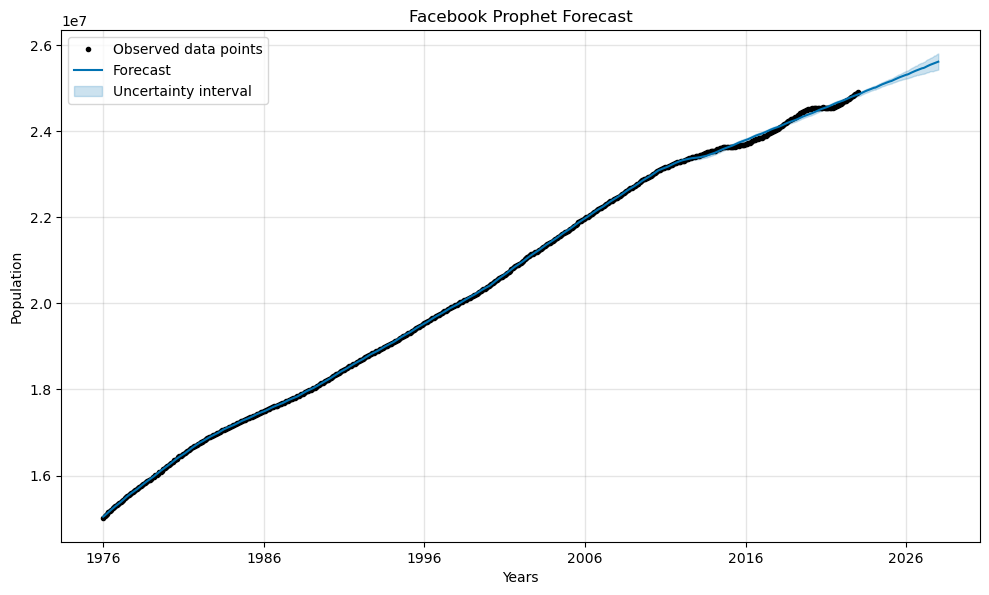

In [19]:
fb_df = pd.read_csv(url)
fb_df = fb_df[(fb_df['GEO'] == 'Canada') & (fb_df['Age group'] == '15 to 64 years')]
fb_df = fb_df[['REF_DATE', 'Population']]
fb_df['REF_DATE'] = pd.to_datetime(fb_df['REF_DATE'])
fb_df = fb_df.rename(columns={'REF_DATE': 'ds', 'Population': 'y'})

model = Prophet()
model.fit(fb_df)

future = model.make_future_dataframe(periods=60, freq='M')
forecast = model.predict(future)

model.plot(forecast, include_legend=True)
plt.title('Facebook Prophet Forecast')
plt.xlabel('Years')
plt.ylabel('Population')
plt.show()

The forecast follows a linear and smooth trajectory, and shows the population will increase by one million in the next 5 years. The uncertainty levels are narrow too, so the model is pretty confident with the prediction.

### 6 - Conclusions

After this thorough analysis, I can conclude that:

**Employment trends:**
- Employment rate will increase if the population increases.
- The huge spike for unemployment in 2020 was due to the COVID-19 lockdown.
- The employment rate was the highest in 2023 (present).
- The employment rate was the lowest in 1977.
- The unemployment rate was the highest in 1984.
- The unemployment rate was the lowest in 2023 (present).
- Quebec currently has the highest employment rate and the lowest unemployment rate.
- Newfoundland and Labrador currently has the highest unemployment rate.
- Ages between 25 to 54 years have the highest employment rate.
- Ages 55 years and over have the lowest employment rate.
- Ages between 15 to 24 years have the highest unemployment rate.

**Population:**
- Canada's working population has increased by atleast 10 million since 1976.
- Ontario's working population is the highest out of all provinces.
- Prince Edward Island's working population is the lowest out of all provinces.
- Newfoundland and Labrador is the only province that has had a decline in their working population.


**Facebook Prophet Forecasting**
- Canada's employment rate will increase to 75% by 2028.
- Canada's working population will increase to 26 million by 2028.
